# Tarea 1: Preprocesado

### Integrantes:

    - Javier Vega 
    - Erick Calvo


##### Prepocesamiento para del set de datos: hotel_bookings.csv

    1. Análisis Exploratorio de Datos.
    2. Valores Faltantes.
    3. Outliers
    4. Datos no-balanceados.
    5. Transfomación de datos.

##### Librerías de Python requeridas:

    A continuación se presentan la lista de librerías que se requieren para llevar a cabo las tareas de preprocesamiento solicitadas:
        1. pandas
        2. numpy
        3. sklean
        4. torch
        5. matplorlib
        6. seaborn

In [1]:
#Importar todas las librerias requeridas

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch 
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

##### Carga de Datos:

    Se cargan los datos del dataset de hotel_bookings.csv

In [2]:
#Cargar los datos 

hotel_bookings = pd.read_csv("hotel_bookings.csv")

##### Visualización de Datos:

    Se visualizan las primeras filas de datos del dataset de hotel_bookings.csv

In [3]:
#Visualización de datos:

hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


##### Análisis exploratorio de Datos:

    La idea es poder visualizar los datos y poder detectar posible errores, datos faltantes, etc.

In [4]:
#Visualización de las principales estadísticas del dataset.

hotel_bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


    Utilizamos seaborn para visualizar algunos de los atributos de forma gráfica.

    Revisando los datos podemos darnos cuenta que el set presenta algunos problemas, hay algunos atributos que estan en formato de texto y otros que contienen datos faltantes.

##### Pasar los atributos texto a número:

    En este caso como podemos observar el dataset contiene algunas columnas que tienen valores tipo texto las cuales debemos convertir en valores númericos:
        1. Para la columna: arrival_date_month, la idea sería sustituir el mes por su equivalente númerico.
        2. Para las demás columnas la idea sería cambiar mediante OrdinalEncoder de sklearn.

##### Sustitución del mes por su equivalente númerico:

    A continuación se muestra como se realiza el cambio:

In [5]:
#Sustituir los meses por su equivalente numérico:

hotel_bookings.replace(to_replace='January', value = 1, inplace = True)
hotel_bookings.replace(to_replace='February', value = 2, inplace = True)
hotel_bookings.replace(to_replace='March', value = 3, inplace = True)
hotel_bookings.replace(to_replace='April', value = 4, inplace = True)
hotel_bookings.replace(to_replace='May', value = 5, inplace = True)
hotel_bookings.replace(to_replace='June', value = 6, inplace = True)
hotel_bookings.replace(to_replace='July', value = 7, inplace = True)
hotel_bookings.replace(to_replace='August', value = 8, inplace = True)
hotel_bookings.replace(to_replace='September', value = 9, inplace = True)
hotel_bookings.replace(to_replace='October', value = 10, inplace = True)
hotel_bookings.replace(to_replace='November', value = 11, inplace = True)
hotel_bookings.replace(to_replace='December', value = 12, inplace = True)

##### Utilización de OrdinalEncoder:

    A continuación se muestra como se utiliza OrdinalEncoder de sklearn para cambiar los valores de los atributos de tipo texto a número.

In [6]:
#Atributos tipo texto:
hotel_cat = hotel_bookings[['hotel']]
deposit_type_cat = hotel_bookings[['deposit_type']]
customer_type_cat = hotel_bookings[['customer_type']]
reservation_status_cat = hotel_bookings[['reservation_status']]

print(hotel_bookings['hotel'].unique())
print(hotel_bookings['deposit_type'].unique())
print(hotel_bookings['customer_type'].unique())
print(hotel_bookings['reservation_status'].unique())

['Resort Hotel' 'City Hotel']
['No Deposit' 'Refundable' 'Non Refund']
['Transient' 'Contract' 'Transient-Party' 'Group']
['Check-Out' 'Canceled' 'No-Show']


In [7]:
# Utilizar OrdinalEncoder de sklearn para cambiar los datos a datos numéricos

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
hotel_cat_encoded = ordinal_encoder.fit_transform(hotel_cat)
hotel_bookings['hotel'] = hotel_cat_encoded

deposit_type_cat_encoded = ordinal_encoder.fit_transform(deposit_type_cat)
hotel_bookings['deposit_type'] = deposit_type_cat_encoded

customer_type_cat = ordinal_encoder.fit_transform(customer_type_cat)
hotel_bookings['customer_type'] = customer_type_cat

reservation_status_cat_encoded = ordinal_encoder.fit_transform(reservation_status_cat)
hotel_bookings['reservation_status'] = reservation_status_cat_encoded

In [8]:
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1.0,0,342,2015,7,27,1,0,0,2,...,0.0,NaN,NaN,0,2.0,0.0,0,0,1.0,2015-07-01
1,1.0,0,737,2015,7,27,1,0,0,2,...,0.0,NaN,NaN,0,2.0,0.0,0,0,1.0,2015-07-01
2,1.0,0,7,2015,7,27,1,0,1,1,...,0.0,NaN,NaN,0,2.0,75.0,0,0,1.0,2015-07-02
3,1.0,0,13,2015,7,27,1,0,1,1,...,0.0,304.0,NaN,0,2.0,75.0,0,0,1.0,2015-07-02
4,1.0,0,14,2015,7,27,1,0,2,2,...,0.0,240.0,NaN,0,2.0,98.0,0,1,1.0,2015-07-03


##### Limpiando los datos:

    

In [9]:
#Visualización de las principales estadísticas del dataset.

hotel_bookings.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.335539,0.370416,104.011416,2016.156554,6.552483,27.165173,15.798241,0.927599,2.500302,1.856403,...,0.221124,0.124893,86.693382,189.266735,2.321149,2.137323,101.831122,0.062518,0.571363,0.649803
std,0.472181,0.482918,106.863097,0.707476,3.090619,13.605138,8.780829,0.998613,1.908286,0.579261,...,0.652306,0.334678,110.774548,131.655015,17.594721,0.577040,50.535790,0.245291,0.792798,0.497776
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,18.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,9.000000,62.000000,0.000000,2.000000,69.290000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,69.000000,2016.000000,7.000000,28.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,14.000000,179.000000,0.000000,2.000000,94.575000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,160.000000,2017.000000,9.000000,38.000000,23.000000,2.000000,3.000000,2.000000,...,0.000000,0.000000,229.000000,270.000000,0.000000,2.000000,126.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,737.000000,2017.000000,12.000000,53.000000,31.000000,19.000000,50.000000,55.000000,...,21.000000,2.000000,535.000000,543.000000,391.000000,3.000000,5400.000000,8.000000,5.000000,2.000000


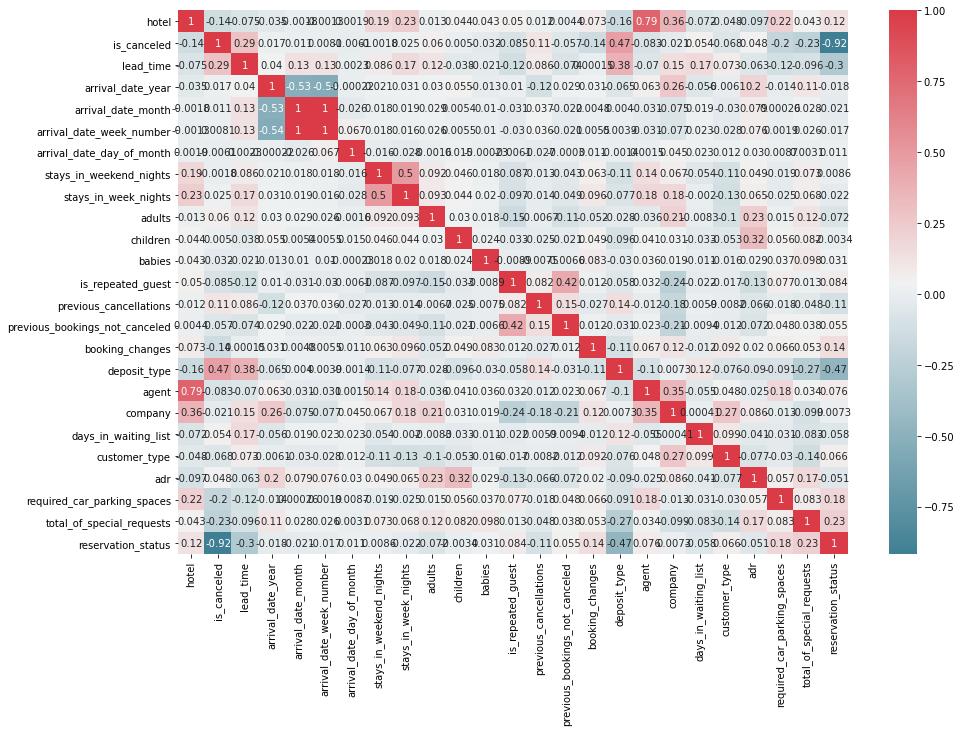

In [10]:
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df1.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(hotel_bookings)

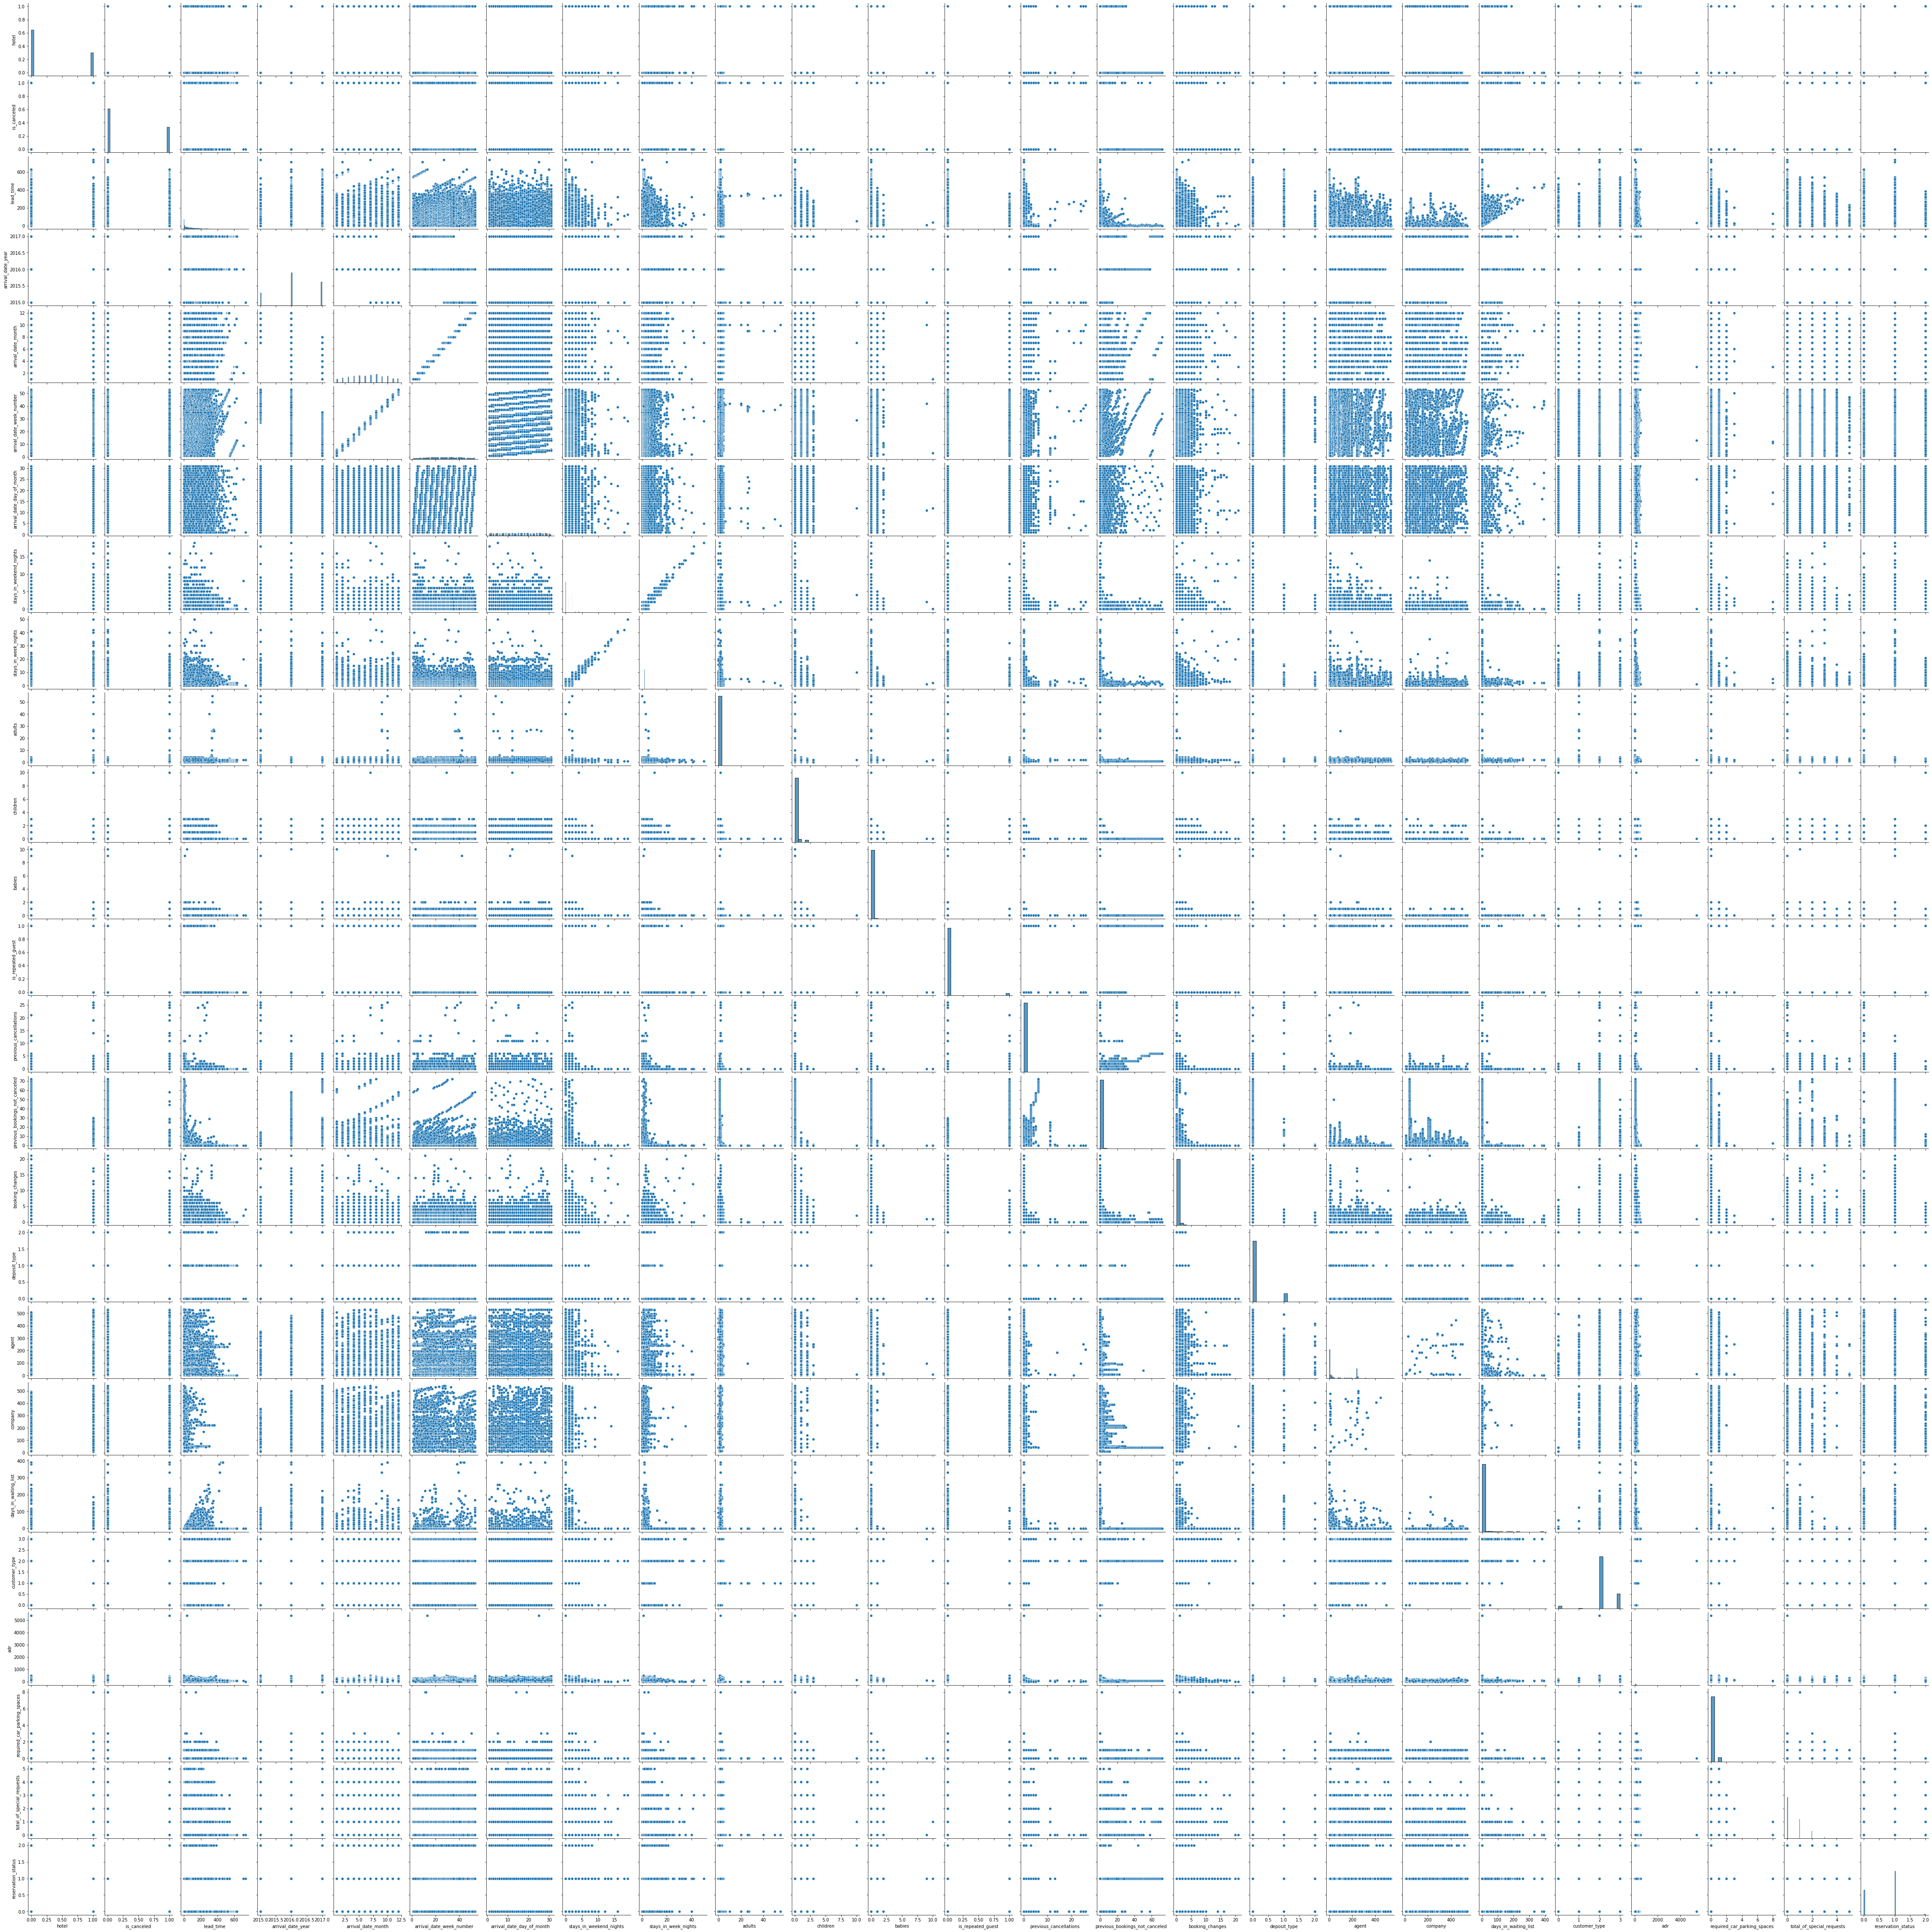

In [11]:
sns.pairplot(hotel_bookings);